# Mchezopesa Football Outcome Predictions

## Defining the Question

### a) Problem Statement

> Mchezopesa Limited a company within the sports gambling world wishes build a model that can be used to predict the results of any game between two teams, Team 1 and Team 2.

> There are two possible approaches to this problem (as  shown below) given the datasets provided:

> **Approach 1: Polynomial approach** - What to train given:

            Rank of home team
            Rank of away team
            Tournament type

    Model 1: Predict how many goals the home team scores.

    Model 2: Predict how many goals the away team scores.

> **Approach 2: Logistic approach** - Feature Engineering 

    Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


### b) Success Metrics
* Accuracy score of above 80%
* Least possible RMSE value
* Identifying the best Model


### c) Understanding the context 

> After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

> This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

> The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

This shall be the basis of our analysis.

### d) Recording the Experimental Design

* Cleaning the data
* Merging Datasets
* Perform any necessary feature engineering
* Check of multicollinearity
* Building the model
* Cross-validation of the model
* Compute RMSE
* Creating residual plots for the models to assess heteroscedasticity using Bartlett’s test
* Conclusion

### e) Data Relevance

For this study there are two datasets available.
* Team Ranking provided by Fifa
* Previous Match Resuslts

These two will provide the perception of the team in terms of rank and previous results of matches. Combining the two provides needed input for the model.

## Reading the Data and Loading Dependencies

In [212]:
# DEPENDENCIES

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime as dt

# ML Processes

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score

In [213]:
# Loading data
team_ranking = pd.read_csv('/content/fifa_ranking.csv')
match_results = pd.read_csv('/content/results.csv')


## Checking the Data

Fifa Team Ranking Data

In [214]:
# No of records in our dataset
team_ranking.shape

(57793, 16)

In [215]:
# Previewing the top of our dataset
team_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [216]:
# Previewing the bottom of our dataset
team_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [217]:
# Checking whether each column has an appropriate datatype
team_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [218]:
# Further statistical description of the data
team_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


Match Result Data

In [219]:
# No of records in our dataset
match_results.shape

(40839, 9)

In [220]:
# Previewing the top of our dataset
match_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [221]:
# Previewing the bottom of our dataset
match_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [222]:
# Checking whether each column has an appropriate datatype
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [223]:
# Further statistical description of the data
match_results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## Tidying the Dataset

In [224]:
# Checking for duplicate values
def duplicated_data_check(data):
  return data.duplicated().any()

print('Data 1: ', duplicated_data_check(team_ranking))
print('Data 2: ', duplicated_data_check(match_results))

Data 1:  True
Data 2:  False


* The team_ranking dataset has got duplicate values

In [225]:
# Removing the duplicates from team_ranking team
team_ranking.drop_duplicates(keep='first', inplace = True)

In [226]:
# Checking for missing values
def missing_data_check(data):
  return data.isnull().any().sum()

print('Data 1: ', missing_data_check(team_ranking))
print('Data 2: ', missing_data_check(match_results))

Data 1:  0
Data 2:  0


In [227]:
# Dropping Unnecessay columns from match_results dataset
match_results = match_results.drop(['city','country','neutral'], axis=1)

In [228]:
# Creating a new column of WIN, LOSE or DRAW for the match_results data

classification = []
for i in range(len(match_results['home_team'])):
  if match_results['home_score'][i] > match_results['away_score'][i]:
    classification.append('Win')
  elif match_results['home_score'][i] < match_results['away_score'][i]:
    classification.append('Lose')
  else:
    classification.append('Draw')
    
match_results['status'] = classification

In [229]:
# Viewing the match_results DataFrame
match_results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,status
0,1872-11-30,Scotland,England,0,0,Friendly,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Win
3,1875-03-06,England,Scotland,2,2,Friendly,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Win


In [230]:
# Selecting needed columns from the team_ranking dataset
required_columns = ['rank', 'country_full','rank_date']
team_ranking = team_ranking[required_columns]

In [231]:
# Snip view of our selected columns
team_ranking.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [232]:
# Checking column for both the data sets
print('Data 1: ', team_ranking.columns)
print('\n')
print('Data 2', match_results.columns)

Data 1:  Index(['rank', 'country_full', 'rank_date'], dtype='object')


Data 2 Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'status'],
      dtype='object')


* In combining of the two data sets it is important to note that the rank should be picked from time relative to the match

In [233]:
# Renaming the rank_date column in team_ranking for uniformity

team_ranking.rank_date = team_ranking.rename({'rank_date': 'date'}, axis = 1, inplace = True)
team_ranking.columns

Index(['rank', 'country_full', 'date'], dtype='object')

In [234]:
# Comparing date formats
print(list(team_ranking.date[:10]))
print('')
print(list(match_results.date[:10]))

['1993-08-08', '1993-08-08', '1993-08-08', '1993-08-08', '1993-08-08', '1993-08-08', '1993-08-08', '1993-08-08', '1993-08-08', '1993-08-08']

['1872-11-30', '1873-03-08', '1874-03-07', '1875-03-06', '1876-03-04', '1876-03-25', '1877-03-03', '1877-03-05', '1878-03-02', '1878-03-23']


In [235]:
# Converting the two date columns into datetime variables
team_ranking.date = pd.to_datetime(team_ranking.date)
match_results.date = pd.to_datetime(match_results.date)

In [236]:
# Checking the the date range for match_result data
match_results.date.describe()

count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

In [237]:
# Checking the the date range for match_result data
team_ranking.date.describe()

count                   57756
unique                    286
top       2017-04-06 00:00:00
freq                      211
first     1993-08-08 00:00:00
last      2018-06-07 00:00:00
Name: date, dtype: object

* One data set has years running from 1872 to 2019 while the other one has got years running from 1993 to 2018.

In [238]:
# Creating year columns for each of the two above datasets

# team_ranking data 'year' column
team_ranking['year'] = team_ranking.date.dt.year
team_ranking['month'] = team_ranking.date.dt.month

# match_result data 'year' column
match_results['year'] = match_results.date.dt.year
match_results['month'] = match_results.date.dt.month

In [239]:
# Dropping the date column from both the datasets
team_ranking = team_ranking.drop(['date'], axis=1)
match_results = match_results.drop(['date'], axis=1)

In [240]:
# Creating home_team information DataFrame
home_team = pd.merge(match_results, team_ranking, left_on=['home_team', 'year', 'month'], 
                     right_on = ['country_full', 'year', 'month'], how = 'inner')

home_team.head()

,home_team,away_team,home_score,away_score,tournament,status,year,month,rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Draw,1993,8,19,Colombia
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Win,1993,8,19,Colombia
2,Colombia,Peru,4,0,FIFA World Cup qualification,Win,1993,8,19,Colombia
3,Peru,Argentina,0,1,FIFA World Cup qualification,Lose,1993,8,70,Peru
4,Peru,Colombia,0,1,FIFA World Cup qualification,Lose,1993,8,70,Peru


In [241]:
# Creating away_team information DataFrame
away_team = pd.merge(match_results, team_ranking, left_on=['away_team', 'year', 'month'], 
                     right_on = ['country_full', 'year', 'month'], how = 'inner')

away_team.head()

,home_team,away_team,home_score,away_score,tournament,status,year,month,rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Draw,1993,8,67,Paraguay
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Draw,1993,8,67,Paraguay
2,Peru,Argentina,0,1,FIFA World Cup qualification,Lose,1993,8,5,Argentina
3,Paraguay,Argentina,1,3,FIFA World Cup qualification,Lose,1993,8,5,Argentina
4,Colombia,Argentina,2,1,FIFA World Cup qualification,Win,1993,8,5,Argentina


In [242]:
# Renaming some of the away_team and home_team datasets for clarity in final data
away_team = away_team.rename(columns = {'rank':'away_team_rank'}, inplace = False)
home_team = home_team.rename(columns = {'rank':'home_team_rank'}, inplace = False)

In [243]:
# Checking our column namings
print(away_team.columns)
print('')
print(home_team.columns)

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'status', 'year', 'month', 'away_team_rank', 'country_full'],
      dtype='object')

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'status', 'year', 'month', 'home_team_rank', 'country_full'],
      dtype='object')


In [244]:
# Combining the final DataFrame

final_df = pd.merge(home_team, away_team, left_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament','status', 'year', 'month'],
                    right_on = ['home_team', 'away_team', 'home_score', 'away_score', 'tournament','status', 'year', 'month'],
                    how = 'inner')

In [245]:
final_df.head()

,home_team,away_team,home_score,away_score,tournament,status,year,month,home_team_rank,country_full_x,away_team_rank,country_full_y
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Draw,1993,8,19,Colombia,67,Paraguay
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Win,1993,8,19,Colombia,5,Argentina
2,Colombia,Peru,4,0,FIFA World Cup qualification,Win,1993,8,19,Colombia,70,Peru
3,Peru,Argentina,0,1,FIFA World Cup qualification,Lose,1993,8,70,Peru,5,Argentina
4,Peru,Colombia,0,1,FIFA World Cup qualification,Lose,1993,8,70,Peru,19,Colombia


In [246]:
# Further cleaning, Dropping unnecessary columns
final_df = final_df.drop(['month','country_full_x','country_full_y'], axis=1)

In [247]:
final_df.head()

,home_team,away_team,home_score,away_score,tournament,status,year,home_team_rank,away_team_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Draw,1993,19,67
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Win,1993,19,5
2,Colombia,Peru,4,0,FIFA World Cup qualification,Win,1993,19,70
3,Peru,Argentina,0,1,FIFA World Cup qualification,Lose,1993,70,5
4,Peru,Colombia,0,1,FIFA World Cup qualification,Lose,1993,70,19


* This is our final data for use in analysis

In [248]:
# Exploring our new DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16992 entries, 0 to 16991
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   home_team       16992 non-null  object
 1   away_team       16992 non-null  object
 2   home_score      16992 non-null  int64 
 3   away_score      16992 non-null  int64 
 4   tournament      16992 non-null  object
 5   status          16992 non-null  object
 6   year            16992 non-null  int64 
 7   home_team_rank  16992 non-null  int64 
 8   away_team_rank  16992 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.3+ MB


* There is no missing data

In [249]:
# Checking for duplicated entries
# Using our function duplicated_data_check(data)

print("Presence of Duplicates :", duplicated_data_check(final_df))

Presence of Duplicates : True


In [250]:
# Removing the duplicate entries
final_df = final_df.drop_duplicates()

## Univariate & Bivariate Analysis

In [251]:
# General summary of the numeric data
final_df.describe()

,home_score,away_score,year,home_team_rank,away_team_rank
count,16863.000000,16863.000000,16863.000000,16863.000000,16863.000000
mean,1.604578,1.069620,2006.498784,76.028109,78.857854
std,1.616018,1.245946,6.803770,50.854482,52.007727
min,0.000000,0.000000,1993.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,33.000000,35.000000
50%,1.000000,1.000000,2007.000000,70.000000,72.000000
75%,2.000000,2.000000,2012.000000,112.000000,115.000000
max,31.000000,15.000000,2018.000000,209.000000,209.000000


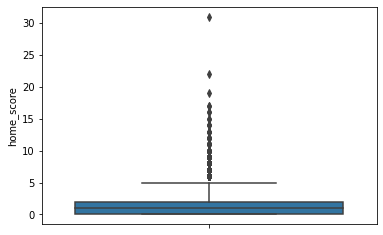

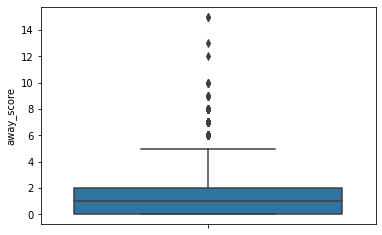

In [252]:
# Ploting the univariate summaries and recording our observations
# Box plot summaries

cols = ['home_score', 'away_score']

for each in cols:
  sns.boxplot(x = each, data = final_df, orient='vert')
  plt.show()

* Extreme goals have been scored in the history of these matches

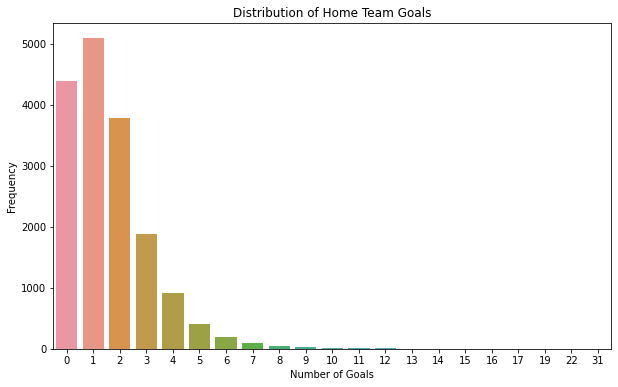

In [253]:
# Visualizing the spread of the goals scored by the Home Team

plt.figure(figsize = (10, 6))
ax = sns.countplot(final_df.home_score)
# ax.set_facecolor('orange')
plt.ylabel('Frequency')
plt.xlabel('Number of Goals')
plt.title('Distribution of Home Team Goals')
plt.show()



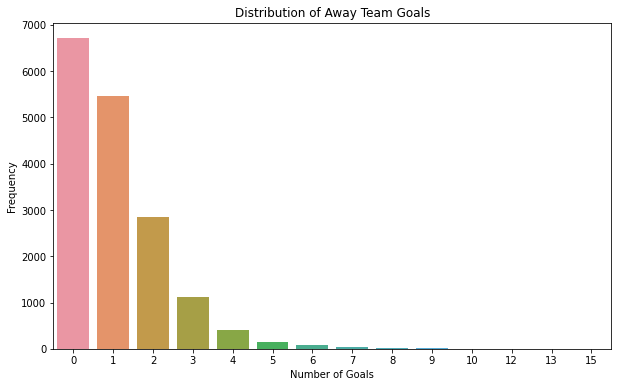

In [254]:
# Visualizing the spread of the goals scored by the Away Team

plt.figure(figsize = (10, 6))
ax = sns.countplot(final_df.away_score)
# ax.set_facecolor('orange')
plt.ylabel('Frequency')
plt.xlabel('Number of Goals')
plt.title('Distribution of Away Team Goals')
plt.show()



Text(0.5, 1.0, 'Top 7 Tournaments')

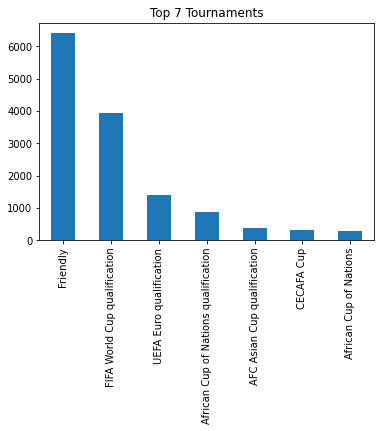

In [255]:
# Creating a summary plot of the top 7 tournaments played
final_df['tournament'].value_counts().head(7).plot.bar()
plt.title('Top 7 Tournaments')

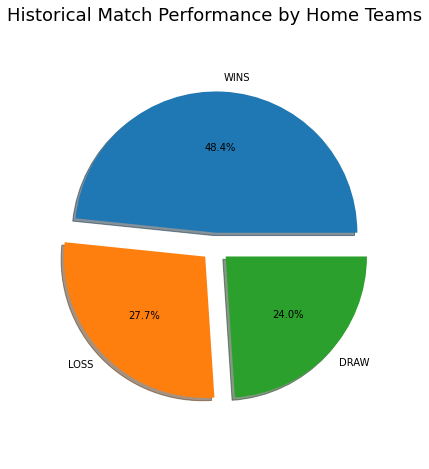

In [256]:
# Visualizing the results of the matches over the years

plt.figure(figsize=(6,8))
plt.pie(final_df['status'].value_counts(),labels=['WINS','LOSS','DRAW'], explode=[0.1,0.1,0.1], autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title('Historical Match Performance by Home Teams', size=18)
plt.show()

Text(0.5, 1.0, 'Multiple plots to explore possible relationships')

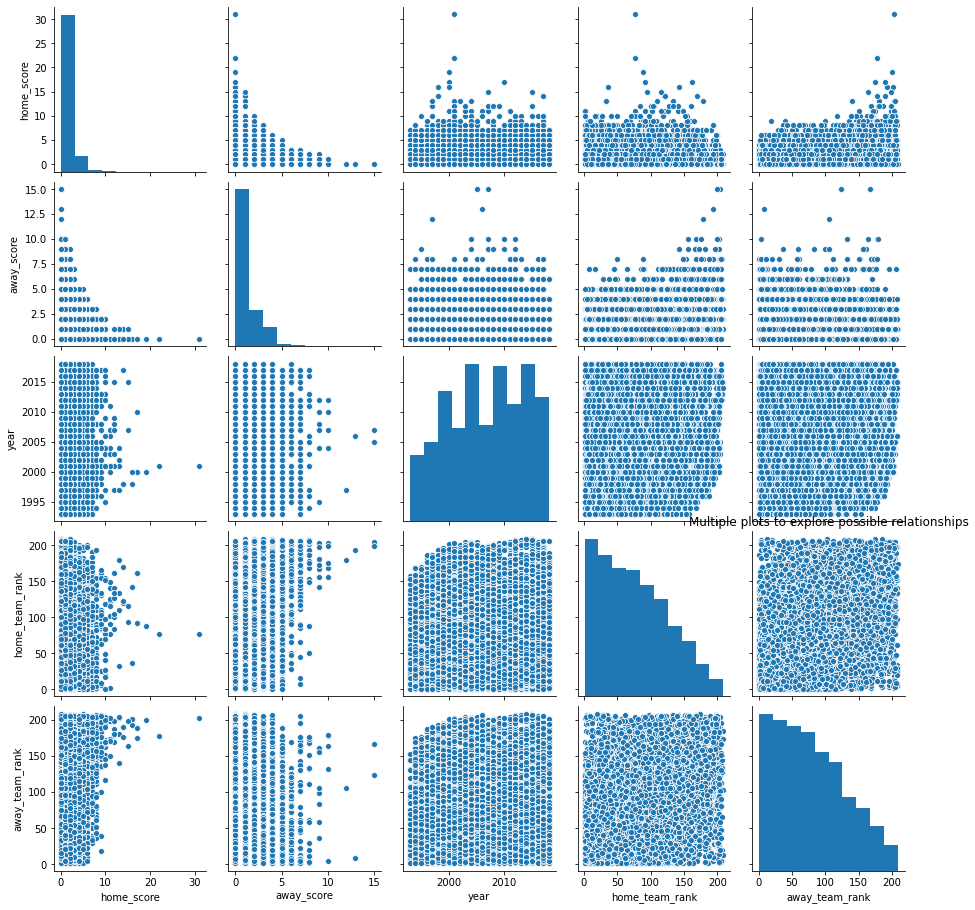

In [257]:
# Pairplot of the variables

sns.pairplot(final_df)
plt.title('Multiple plots to explore possible relationships')

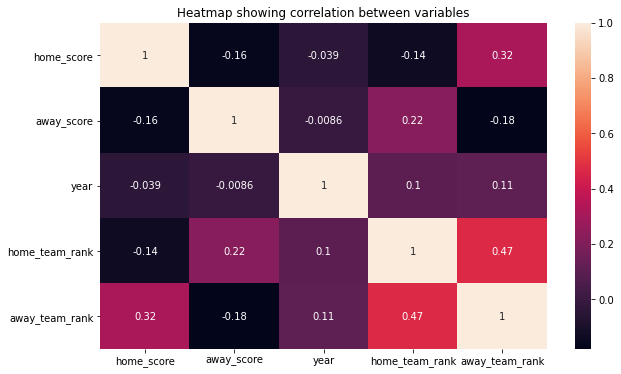

In [258]:
# Computing correlation coeffiecient between features
plt.figure(figsize = (10, 6))
sns.heatmap(final_df.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

* No sign of linear relationship

## Multicollinearity check

In [261]:
# Correlations in the data set
correlations = final_df.corr()
correlations

,home_score,away_score,year,home_team_rank,away_team_rank
home_score,1.000000,-0.163729,-0.038793,-0.135425,0.318737
away_score,-0.163729,1.000000,-0.008588,0.221716,-0.179903
year,-0.038793,-0.008588,1.000000,0.104394,0.106361
home_team_rank,-0.135425,0.221716,0.104394,1.000000,0.469455
away_team_rank,0.318737,-0.179903,0.106361,0.469455,1.000000


In [262]:
# Using the VIF method to determine multicollinearity
vif_coeff = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

# Taking the abovee computed values and computing their absolute values
vif_coeff = abs(vif_coeff.values)

# Writing them back into a DataFrame
vif_coeff = pd.DataFrame(vif_coeff, columns = correlations.columns)

vif_coeff

,home_score,away_score,year,home_team_rank,away_team_rank
0,1.263711,0.007429,0.067641,0.460256,0.627391
1,0.007429,1.180299,0.012595,0.467127,0.432663
2,0.067641,0.012595,1.019113,0.051408,0.103554
3,0.460256,0.467127,0.051408,1.638020,0.994247
4,0.627391,0.432663,0.103554,0.994247,1.755578



* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

So in this case the colinearity is not all that significant


## Polynomial Regression Analysis

### Model 1

Predict how many goals the **home team** scores.

In [269]:
# Extracting X and Y datasets
X = final_df[['home_team_rank', 'away_team_rank']]
y = final_df[['home_score']]

In [270]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [273]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Making Prediction

In [274]:
# Predict using Polynomial Regression
poly_pred = pol_reg_4.predict(poly_reg.fit_transform(X_test))
print(poly_pred)

NameError: ignored

In [179]:
# Prints y-intercept
print(pol_reg.intercept_)

# Prints the beta coefficients in order
print(pol_reg.coef_)

[1.26330373]
[[ 0.00000000e+00 -1.78159756e-02  2.61500179e-02  2.23898292e-04
  -2.93663622e-04 -1.09989838e-04 -1.65016477e-06  2.28847206e-06
   3.86473542e-07  3.62898772e-07  3.93934504e-09 -3.73843371e-09
  -8.09804879e-09  4.49500632e-09  3.94719601e-10]]


Evaluating our Model

In [ ]:
# print('The rmse score is : ', np.sqrt(mean_squared_error(poly_pred, y_test)))

### Model 2

Predict how many goals the **away team** scores.

In [180]:
# Extracting X and Y datasets
X = final_df[['home_team_rank', 'away_team_rank']]
y = final_df[['away_score']]

In [181]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [182]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)

pol_reg1 = LinearRegression()
pol_reg1.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Making Prediction

In [183]:
# Predict using Polynomial Regression
poly_pred1 = pol_reg.predict(poly_reg_4.fit_transform([[48, 5]]))
print(poly_pred1)

[[0.84430219]]


In [184]:
# Prints y-intercept
print(pol_reg.intercept_)

# Prints the beta coefficients in order
print(pol_reg.coef_)

[1.26330373]
[[ 0.00000000e+00 -1.78159756e-02  2.61500179e-02  2.23898292e-04
  -2.93663622e-04 -1.09989838e-04 -1.65016477e-06  2.28847206e-06
   3.86473542e-07  3.62898772e-07  3.93934504e-09 -3.73843371e-09
  -8.09804879e-09  4.49500632e-09  3.94719601e-10]]


## Logistic Regression

The students exhaustively perform Logistic regression by performing feature engineering where necessary, Training an optimal classifier, Interpret the result obtained and make a suitable prediction. The students should also challenge their solution by providing insights on how you can make improvements.

In [186]:
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 
  
# Encode labels in column 'species'. 
final_df['tournament']= label_encoder.fit_transform(final_df['tournament']) 
  
final_df['tournament'].unique()

array([26, 27,  7,  9, 61, 37, 13,  6, 12, 57, 34, 25, 46, 10, 30, 51, 11,
       23, 33, 49, 18, 35, 60, 16, 38, 52, 58, 45, 64,  2, 28, 36,  5,  1,
       32, 22, 20, 41, 14, 53, 15, 54, 29, 59, 43, 63, 56, 39, 48, 50, 24,
        3, 19, 55,  4,  8, 62, 21, 42, 40, 47,  0, 44, 17, 31])

In [187]:
# split dataset in features and target variable
feature_cols = ['home_score', 'away_score', 'year', 'home_team_rank','away_team_rank','tournament']

X = final_df[feature_cols]    # Features
y = final_df.status           # Target variable

In [188]:
final_df.head()

,home_team,away_team,home_score,away_score,tournament,status,year,home_team_rank,away_team_rank
0,Colombia,Paraguay,0,0,26,Draw,1993,19,67
1,Colombia,Argentina,2,1,26,Win,1993,19,5
2,Colombia,Peru,4,0,26,Win,1993,19,70
3,Peru,Argentina,0,1,26,Lose,1993,70,5
4,Peru,Colombia,0,1,26,Lose,1993,70,19


In [192]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [193]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [195]:
# import the metrics class
# from sklearn import metrics
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 136,  325,  554],
       [ 151,  868,  168],
       [   0,  110, 1904]])

Text(0.5, 257.44, 'Predicted label')

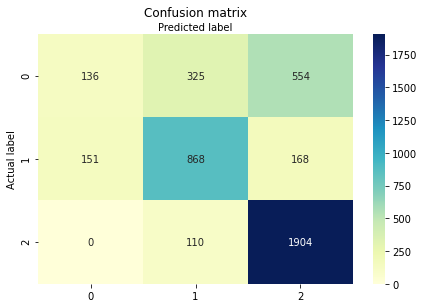

In [206]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [202]:
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.6897533206831119


## Challenging the solution

* The accuracy of 68.98% is below our desired threshhold
* The model could further be improved through hypeparameter tuning




